![STV](stv.png)

# OCS - PROFILE TEMPLATE
## Catenary System, Fexible Hangers

Calculate the static change in contact wire height when uplifted by a point load, over a span.
Input system data and uplift force, output is an Elasticity graph

*The "_system" Python code module handles loading all other required references*

In [1]:
import _system as OCS

### ------INPUT DATA-------
#### ELASTICITY CONDITIONS
*Positive Uplift force is in the upward direction.*
*(positive weight is normally downwards, but case has changed due to name)*

In [2]:
UpliftForce = 25

*Resolution of elasticity graph*

In [3]:
SpanStepSize = 1

*Recommend to limit analysis to 1 to 3 spans for simulation time*

In [4]:
SpanstoAnalyze = 1
StartSPT = 3

*Recommend at least 3 span buffer for simulation accuracy*

In [5]:
EndSPT = StartSPT + 3 + SpanstoAnalyze + 3

#### LAYOUT DESIGN
*Data loaded from Sound Transit L800, wire run N51*

In [6]:
wirerunfilepath = 'InputData_none.csv'
wr = OCS.wire_run(wirerunfilepath, StartSPT, EndSPT)

#### CONDUCTOR PARTICULARS AND LOADING CONDITIONS
*Input format is (MW(Weight, Tension), CW(Weight, Tension), HA Weight)*

In [7]:
cN = OCS.conductor_particulars((1.544, 5000), (1.063, 3300), 0.2)

### ------SOLVE-------
*Solve flexible hanger catenary geometry utilizing the "_systems" module. Need to call "_solve" discretely*

In [8]:
Nominal = OCS.CatenaryFlexible(cN, wr)
Nominal._solve()
Elasticity = OCS.Elasticity(cN, Nominal, UpliftForce, SpanStepSize, StartSPT+3, EndSPT-3)

Checking elasticity from STA 163828.0 to STA 164013.0
 |  185 total cycles estimating to take 138.75 seconds
185  total loops processed in 485.7187 seconds with average cycle time of 2625.5064 milliseconds


### ------OUTPUT-------

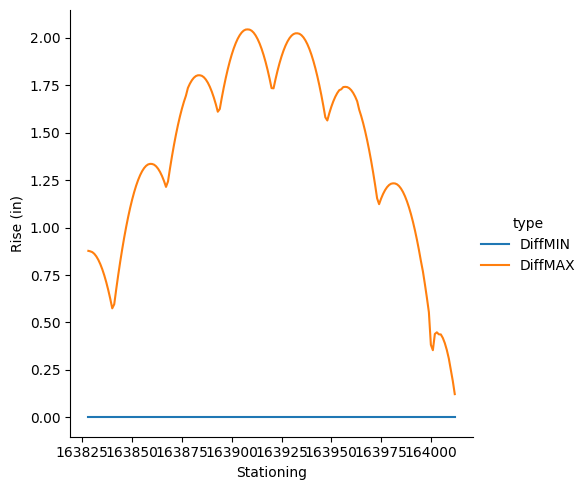

In [9]:
Elasticity.plot()

In [10]:
Elasticity.savetocsv('_output.elasticity.csv')